In [24]:
# pip install requests pandas matplotlib seaborn

In [25]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

### Extraemos de la primera api el primer json y vemos las categorías de comida que tenemos y el numero de recetas de cada una

In [26]:


# URL del endpoint de categorías
url = "https://es-mycooktouch.group-taurus.com/categories/"

# Realiza la solicitud GET
response = requests.get(url)

# Verifica que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Convierte la respuesta a formato JSON
    data = response.json()
    
    # Guarda el contenido en un archivo JSON
    with open('categorias.json', 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=6)
    
    print("¡Contenido guardado en categorias.json!")
else:
    print(f"Error en la solicitud. Código de estado: {response.status_code}")


¡Contenido guardado en categorias.json!


### Creamos un df con las columnas mas relevantes


In [27]:

# Cargar el archivo JSON
with open('categorias.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Crear un DataFrame con las características principales
df_categorias = pd.DataFrame(data, columns=[
    'name', 
    'niceName', 
    'visibility', 
    'region', 
    'count', 
    'checkedCount'
])

# Mostrar el DataFrame
df_categorias



,name,niceName,visibility,region,count,checkedCount
0,Aperitivos y tapas,aperitivos-tapas,True,ES-MYCOOKTOUCH,1180,132
1,Arroces,arroces,True,ES-MYCOOKTOUCH,859,58
2,Bebidas y cócteles,bebidas-y-cocktails,True,ES-MYCOOKTOUCH,620,91
3,Carnes y aves,carnes-y-aves,True,ES-MYCOOKTOUCH,1453,179
4,"Cremas, caldos y sopas",cremas-caldos-sopas,True,ES-MYCOOKTOUCH,1824,171
5,Dulces y repostería,dulces-y-reposteria,True,ES-MYCOOKTOUCH,5204,429
6,Ensaladas,ensaladas,True,ES-MYCOOKTOUCH,174,63
7,Funciones básicas,funciones,False,ES-MYCOOKTOUCH,14,13
8,Huevos y tarrinas,huevos-y-tarrinas,True,ES-MYCOOKTOUCH,1255,400
9,Masas,masas,True,ES-MYCOOKTOUCH,1087,107


### nos damos cuenta que hay 2 filas con Visibility = False que hacen refencia a dos menus ocultos que no son recetas y nos disponemos a eliminar   

In [28]:
df_categorias.drop(df_categorias[(df_categorias["niceName"] == "otras") | (df_categorias["niceName"] == "funciones")].index, inplace=True)



In [29]:
df_categorias.reset_index(inplace=True, drop=True)

### nuestro ejercicio especifica que tenemos 10.000 recetas pero segun esto habría hasta 18.831

In [30]:
df_categorias["niceName"].value_counts()

niceName
aperitivos-tapas         1
arroces                  1
bebidas-y-cocktails      1
carnes-y-aves            1
cremas-caldos-sopas      1
dulces-y-reposteria      1
ensaladas                1
huevos-y-tarrinas        1
masas                    1
alimentacion-infantil    1
pasta                    1
pescados-y-mariscos      1
potajes-legumbres        1
salsas-y-guarniciones    1
sorbetes-y-helados       1
verduras-y-hortalizas    1
aceites                  1
Name: count, dtype: int64

### Creamos una función que elimine las columnas que tengan un unico valor puesto que aportan poca información

In [31]:
def erase_col(df):   
    for columns in df.columns:
        if len(df[columns].unique()) == 1:
            print(df[columns].unique())
            df.drop(columns=columns, inplace=True)    

In [32]:
print(f"{df_categorias}")

                                name               niceName  visibility  \
0                 Aperitivos y tapas       aperitivos-tapas        True   
1                            Arroces                arroces        True   
2                 Bebidas y cócteles    bebidas-y-cocktails        True   
3                      Carnes y aves          carnes-y-aves        True   
4             Cremas, caldos y sopas    cremas-caldos-sopas        True   
5                Dulces y repostería    dulces-y-reposteria        True   
6                          Ensaladas              ensaladas        True   
7                  Huevos y tarrinas      huevos-y-tarrinas        True   
8                              Masas                  masas        True   
9   Papillas y alimentación infantil  alimentacion-infantil        True   
10                             Pasta                  pasta        True   
11               Pescados y mariscos    pescados-y-mariscos        True   
12               Potajes 

In [33]:
erase_col(df_categorias)

[ True]
['ES-MYCOOKTOUCH']


In [34]:
print(df_categorias.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          17 non-null     object
 1   niceName      17 non-null     object
 2   count         17 non-null     int64 
 3   checkedCount  17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 676.0+ bytes
None


In [35]:
df_categorias

,name,niceName,count,checkedCount
0,Aperitivos y tapas,aperitivos-tapas,1180,132
1,Arroces,arroces,859,58
2,Bebidas y cócteles,bebidas-y-cocktails,620,91
3,Carnes y aves,carnes-y-aves,1453,179
4,"Cremas, caldos y sopas",cremas-caldos-sopas,1824,171
5,Dulces y repostería,dulces-y-reposteria,5204,429
6,Ensaladas,ensaladas,174,63
7,Huevos y tarrinas,huevos-y-tarrinas,1255,400
8,Masas,masas,1087,107
9,Papillas y alimentación infantil,alimentacion-infantil,232,23


In [36]:
df_categorias

,name,niceName,count,checkedCount
0,Aperitivos y tapas,aperitivos-tapas,1180,132
1,Arroces,arroces,859,58
2,Bebidas y cócteles,bebidas-y-cocktails,620,91
3,Carnes y aves,carnes-y-aves,1453,179
4,"Cremas, caldos y sopas",cremas-caldos-sopas,1824,171
5,Dulces y repostería,dulces-y-reposteria,5204,429
6,Ensaladas,ensaladas,174,63
7,Huevos y tarrinas,huevos-y-tarrinas,1255,400
8,Masas,masas,1087,107
9,Papillas y alimentación infantil,alimentacion-infantil,232,23


### como tenemos 10.000 recetas extraemos 5 json de 2000 recetas y las pasamos a df con las columnas que nosotros decidamos

In [38]:


# URL del endpoint de recetas
url = "https://es-mycooktouch.group-taurus.com/recipes/"

# Función para extraer los datos de cada receta
def extract_recipe_data(recipe):
    recipe_data = {
        "title": recipe.get("title", ""),
        'niceName': recipe['niceName'],
        "category": recipe.get("category", ""),
        "totalTime": (recipe.get("totalTime", 0)) / 60,
        "difficulty": recipe.get("difficulty", 0),
        "price": recipe.get("price", 0),
        "ingredients": ", ".join([f"{ing.get('name', '')} ({ing.get('qty', '')} {ing.get('unit', '')})" for ing in recipe.get("ingredients", [])]),
        "steps": len(recipe.get("groups", [{}])[0].get("steps", [])) if recipe.get("groups") else 0,
        "tags": ", ".join(recipe.get("tags", [])),
    }

    groups = recipe.get("groups", [])
    if groups:
        group = groups[0]
        recipe_data["group_name"] = group.get("name", "")
        recipe_data["group_steps"] = ", ".join([step.get("description", "") for step in group.get("steps", [])])

    return recipe_data

# Crear listas para almacenar los DataFrames y los JSON
dataframes = []
json_files = []

# Bucle para obtener 5 bloques de 2000 recetas cada uno
for i in range(5):
    # Parámetros para la solicitud
    params = {
        'profile': 'desktopList',
        'limit': 2000,
        'skip': i * 2000,  # Saltar las recetas ya obtenidas
        'sortBy': 'recent'
    }

    # Realizar la solicitud POST
    response = requests.post(url, params=params)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        print(f"Solicitud {i+1} exitosa!")
        data = response.json()  # Convertir la respuesta a JSON
        
        # Guardar el JSON en un archivo
        json_filename = f"recetas_{i+1}.json"
        with open(json_filename, 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=4, ensure_ascii=False)
        json_files.append(json_filename)
        
        # Procesar todas las recetas
        recipes_data = [extract_recipe_data(recipe) for recipe in data["result"]]

        # Crear el DataFrame
        df = pd.DataFrame(recipes_data)
        dataframes.append(df)

        # Crear una variable global para cada DataFrame
        globals()[f"df_recetas_{i+1}"] = df
        
    else:
        print(f"Error en la solicitud {i+1}: {response.status_code}")

# Mostrar el primer DataFrame como ejemplo
df_recetas_1.head()


Solicitud 1 exitosa!
Solicitud 2 exitosa!
Solicitud 3 exitosa!
Solicitud 4 exitosa!
Solicitud 5 exitosa!


,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps
0,Salsa mozárabe de Belén,salsa-mozarabe-de-belen,Salsas y guarniciones,18.00,2,2,"Aceite Oliva (35 ml), Cebolla (150 gr), Pasas ...",6,,Plato principal,"Calentar el aceite, Añadir Cebolla, pasas y or..."
1,Lentejas con arroz al aroma de Jerez (TM5 v2),lentejas-con-arroz-al-aroma-de-jerez--tm5-v2,Potajes y legumbres,0.05,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",6,,Plato principal,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...
2,Lentejas con arroz al aroma de Jerez (TM5),lentejas-con-arroz-al-aroma-de-jerez,Potajes y legumbres,0.05,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",5,,Plato principal,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...
3,Arroz Rojo Integral con Gambas y Calamar al Aj...,arroz-rojo-integral-con-gambas-y-calamar-al-aj...,Arroces,43.50,1,1,"Ajo (3 clv), Aceite Oliva (60 gr), Guindilla (...",6,Gastronomía/Asiática,Plato principal,Mete los ajos en la jarra junto con el aceite ...
4,Galletas sin azúcar (Snacks),galletas-sin-azucar--snacks,Dulces y repostería,3.00,1,1,"Plátano (2 u), Avena en copos (80 gr), Cacao (...",2,"Dietas/Baja en calorías, Gastronomía/Mediterránea",Plato principal,"Añadimos todos los ingredientes a la jarra, Qu..."


In [ ]:
df_recetas_1.head(3)

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps
0,tortitas de plátano,tortitas-de-platano-2,Dulces y repostería,2.583333,1,1,"Plátano (1 u), Huevo (2 u), Bebida de avena (5...",3,,Masa,"triturar el plátano (maduro), añadiremos los i..."
1,"Salmorejo Cordobés, la auténtica receta",salmorejo-cordobes--la-autentica-receta,"Cremas, caldos y sopas",51.000000,1,1,"Tomates de pera (1500 gr), Diente de ajo (1 u)...",5,"Dietas/Sin huevo, Dietas/Sin lactosa, Estación...",Poner los tomates en la jarra,Poner los tomates previamente lavados y trocea...
2,Tarta de chocolate SIN AZUCAR,tarta-de-chocolate-sin-azucar,Dulces y repostería,10.000000,2,2,Dátiles (previamente remojados 1 hora) (150 gr...,5,"Estación/Invierno, Estación/Otoño, Estación/Pr...",Base de la tarta,Forrarmos un molde con papel vegetal (papel de...


In [39]:
df_list = [df_recetas_1, df_recetas_2, df_recetas_3, df_recetas_4, df_recetas_5]

# Concatenar los 5 DataFrames en uno solo
df_recetas_total = pd.concat(df_list, ignore_index=True)

# Mostrar una vista previa del DataFrame resultante
print(df_recetas_total.head())
print("\nNúmero de filas y columnas en el DataFrame concatenado:", df_recetas_total.shape)

                                               title  \
0                            Salsa mozárabe de Belén   
1      Lentejas con arroz al aroma de Jerez (TM5 v2)   
2         Lentejas con arroz al aroma de Jerez (TM5)   
3  Arroz Rojo Integral con Gambas y Calamar al Aj...   
4                       Galletas sin azúcar (Snacks)   

                                            niceName               category  \
0                            salsa-mozarabe-de-belen  Salsas y guarniciones   
1       lentejas-con-arroz-al-aroma-de-jerez--tm5-v2    Potajes y legumbres   
2               lentejas-con-arroz-al-aroma-de-jerez    Potajes y legumbres   
3  arroz-rojo-integral-con-gambas-y-calamar-al-aj...                Arroces   
4                        galletas-sin-azucar--snacks    Dulces y repostería   

   totalTime  difficulty  price  \
0      18.00           2      2   
1       0.05           1      1   
2       0.05           1      1   
3      43.50           1      1   
4       3.00 

In [73]:
df_recetas_total["tags"].fillna("No disponible", inplace=True)

In [75]:
df_recetas_total.isnull().sum()

title          0
niceName       0
category       0
totalTime      0
difficulty     0
price          0
ingredients    0
steps          0
tags           0
group_name     0
group_steps    0
dtype: int64

In [76]:
df_full = df_recetas_total.copy()

In [77]:
df_full.drop(df_full[(df_full["category"]=="Otras") | (df_full["category"]=="Funciones básicas")].index,inplace=True)

In [78]:
df_full.sample(3)

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps
2020,Ñoquis de patata,noquis-de-patata,Pasta,27.250000,1,1,"Patata (500 gr), Manteca (50 gr), Patata al va...",5,Dietas/Vegetariana,Plato principal,"Hervir las patatas en una cacerola y reservar,..."
1395,"Faves amb pernil, bolets, carxofes i ous ®️",faves-amb-pernil-bolets-carxofes-i-ous,Potajes y legumbres,41.166667,1,2,"Oli d'oliva (30 gr), All (6 clv), Ceba (1 u), ...",6,"Dietas/Sin gluten, Dietas/Sin lactosa, Estació...",Plato principal,"Escalfar l'oli, Fer el sofregit, Triturar, Bar..."
7847,"Bizcocho ""sin gluten"" de calabaza fácil, rápid...",bizcocho-sin-gluten-de-calabaza,Dulces y repostería,53.083333,1,1,"Nueces (50 gr), Calabaza (150 gr), Huevos M (4...",7,"Dietas/Sin gluten, Estación/Invierno, Estación...",Plato principal,pon las nueces en el vaso y trocea 15 segundo...


In [44]:
# Lista para almacenar las respuestas de la API
api_responses = []

# Iterar sobre cada valor en la columna 'niceName'
for recipe_name in df_full['niceName']:
    # Construir la URL de la API
    url = f"https://es-mycooktouch.group-taurus.com/recipe/{recipe_name}"
    
    # Hacer la solicitud a la API
    response = requests.get(url)
    
    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la respuesta a JSON y agregarla a la lista
        api_responses.append(response.json())
    else:
        print(f"Error al obtener la receta {recipe_name}: {response.status_code}")

# Crear un DataFrame a partir de la lista de respuestas
df_full_complete = pd.json_normalize(api_responses)

# Mostrar el DataFrame resultante
df_full_complete.head()


,_id,title,niceName,category,categoryNiceName,categories,course,totalTime,cookTime,difficulty,price,foodGroups,images,videos,groups,tags,advice,rations,region,comments,ratings,__v,accesoriesList,ingredients,ingredientsSummary,user.displayName,user.niceName,user.rank,user.role,user.instagram,user.twitter,user.images,user.web,user.webName,info.creationDate,info.modificationDate,info.creationSource,size.6,size.current,status.idParent,status.rated,status.mine,status.favorite,status.todo,status.private,status.draft,status.ppv,status.canView,status.featured,social.favorite,social.facebook,social.comments,grants.view,grants.search,nutritional.Water.value,nutritional.Water.unit,nutritional.Energy.value,nutritional.Energy.unit,nutritional.Protein.value,nutritional.Protein.unit,nutritional.Lipid Tot.value,nutritional.Lipid Tot.unit,nutritional.Ash.value,nutritional.Ash.unit,nutritional.Carbohydrt.value,nutritional.Carbohydrt.unit,nutritional.Fiber TD.value,nutritional.Fiber TD.unit,nutritional.Sugar Tot.value,nutritional.Sugar Tot.unit,nutritional.Calcium.value,nutritional.Calcium.unit,nutritional.Iron.value,nutritional.Iron.unit,nutritional.Magnesium.value,nutritional.Magnesium.unit,nutritional.Phosphorus.value,nutritional.Phosphorus.unit,nutritional.Potassium.value,nutritional.Potassium.unit,nutritional.Sodium.value,nutritional.Sodium.unit,nutritional.Zinc.value,nutritional.Zinc.unit,nutritional.Copper.value,nutritional.Copper.unit,nutritional.Manganese.value,nutritional.Manganese.unit,nutritional.Selenium.value,nutritional.Selenium.unit,nutritional.Vit C.value,nutritional.Vit C.unit,nutritional.Thiamin.value,nutritional.Thiamin.unit,nutritional.Riboflavin.value,nutritional.Riboflavin.unit,nutritional.Niacin.value,nutritional.Niacin.unit,nutritional.Panto Acid.value,nutritional.Panto Acid.unit,nutritional.Vit B6.value,nutritional.Vit B6.unit,nutritional.Folate Tot.value,nutritional.Folate Tot.unit,nutritional.Folic Acid.value,nutritional.Folic Acid.unit,nutritional.Food Folate.value,nutritional.Food Folate.unit,nutritional.Folate DFE.value,nutritional.Folate DFE.unit,nutritional.Choline Tot .value,nutritional.Choline Tot .unit,nutritional.Vit B12.value,nutritional.Vit B12.unit,nutritional.Vit A IU.value,nutritional.Vit A IU.unit,nutritional.Vit A RAE.value,nutritional.Vit A RAE.unit,nutritional.Retinol.value,nutritional.Retinol.unit,nutritional.Alpha Carot.value,nutritional.Alpha Carot.unit,nutritional.Beta Carot.value,nutritional.Beta Carot.unit,nutritional.Beta Crypt.value,nutritional.Beta Crypt.unit,nutritional.Lycopene.value,nutritional.Lycopene.unit,nutritional.Lut+Zea .value,nutritional.Lut+Zea .unit,nutritional.Vit E.value,nutritional.Vit E.unit,nutritional.Vit D.value,nutritional.Vit D.unit,nutritional.Vit D IU.value,nutritional.Vit D IU.unit,nutritional.Vit K.value,nutritional.Vit K.unit,nutritional.FA Sat.value,nutritional.FA Sat.unit,nutritional.FA Mono.value,nutritional.FA Mono.unit,nutritional.FA Poly.value,nutritional.FA Poly.unit,nutritional.Cholestrl.value,nutritional.Cholestrl.unit,seo.title,seo.description,seo.canonical,seo.autopublishDate,seo.index,seo.follow,seo.url,seo.linkin,seo.suggestions,seo.extra.title,seo.extra.text,seo.keywords,compatibility.current,compatibility.S1,nutritionalExtra.disclaimer._id,nutritionalExtra.disclaimer.region,nutritionalExtra.disclaimer.referenceAdvice,nutritionalExtra.disclaimer.legalText,nutritionalExtra.disclaimer.disclaimerColorCode,nutritionalExtra.disclaimer.methodology,nutritionalExtra.disclaimer.calculateForPax,nutritionalExtra.disclaimer.calculateForRecipe,nutritionalExtra.disclaimer.nutritionalLegend.low,nutritionalExtra.disclaimer.nutritionalLegend.medium,nutritionalExtra.disclaimer.nutritionalLegend.high,nutritionalExtra.disclaimer.__v,nutritionalExtra.disclaimer.niceName,nutritionalExtra.disclaimer.translations.to,nutritionalExtra.disclaimer.image,imageRights,rate,info.modificationSource,compatibility.S2,size.4,size.2,social.todo,size.5,source.name,size.3,size.1,size.8,nu

In [45]:
df_full_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Columns: 213 entries, _id to grant.search
dtypes: bool(9), float64(57), int64(5), object(142)
memory usage: 15.6+ MB


In [46]:
file_name = "df_full_complete.csv"
df_full_complete.to_csv(file_name, index=False)

In [47]:
# Identificar columnas que contienen listas
columnas_con_listas = df_full_complete.columns[
    df_full_complete.applymap(lambda x: isinstance(x, list)).any()
]

# Eliminar esas columnas
df_full_complete = df_full_complete.drop(columns=columnas_con_listas)

# Ahora puedes aplicar nunique() sin problemas
columnas_a_eliminar = df_full_complete.columns[df_full_complete.nunique() == 1]
df_full_complete = df_full_complete.drop(columns=columnas_a_eliminar)

## Este gráfico nos permite dos cosas: explorar de forma grafica los nulos de nuestro df y ademas ver el nombre de las columnas de una forma clara, ya que debido al numero grande de columnas, haciendo un head no se ve claro y haciendo un info tampoco

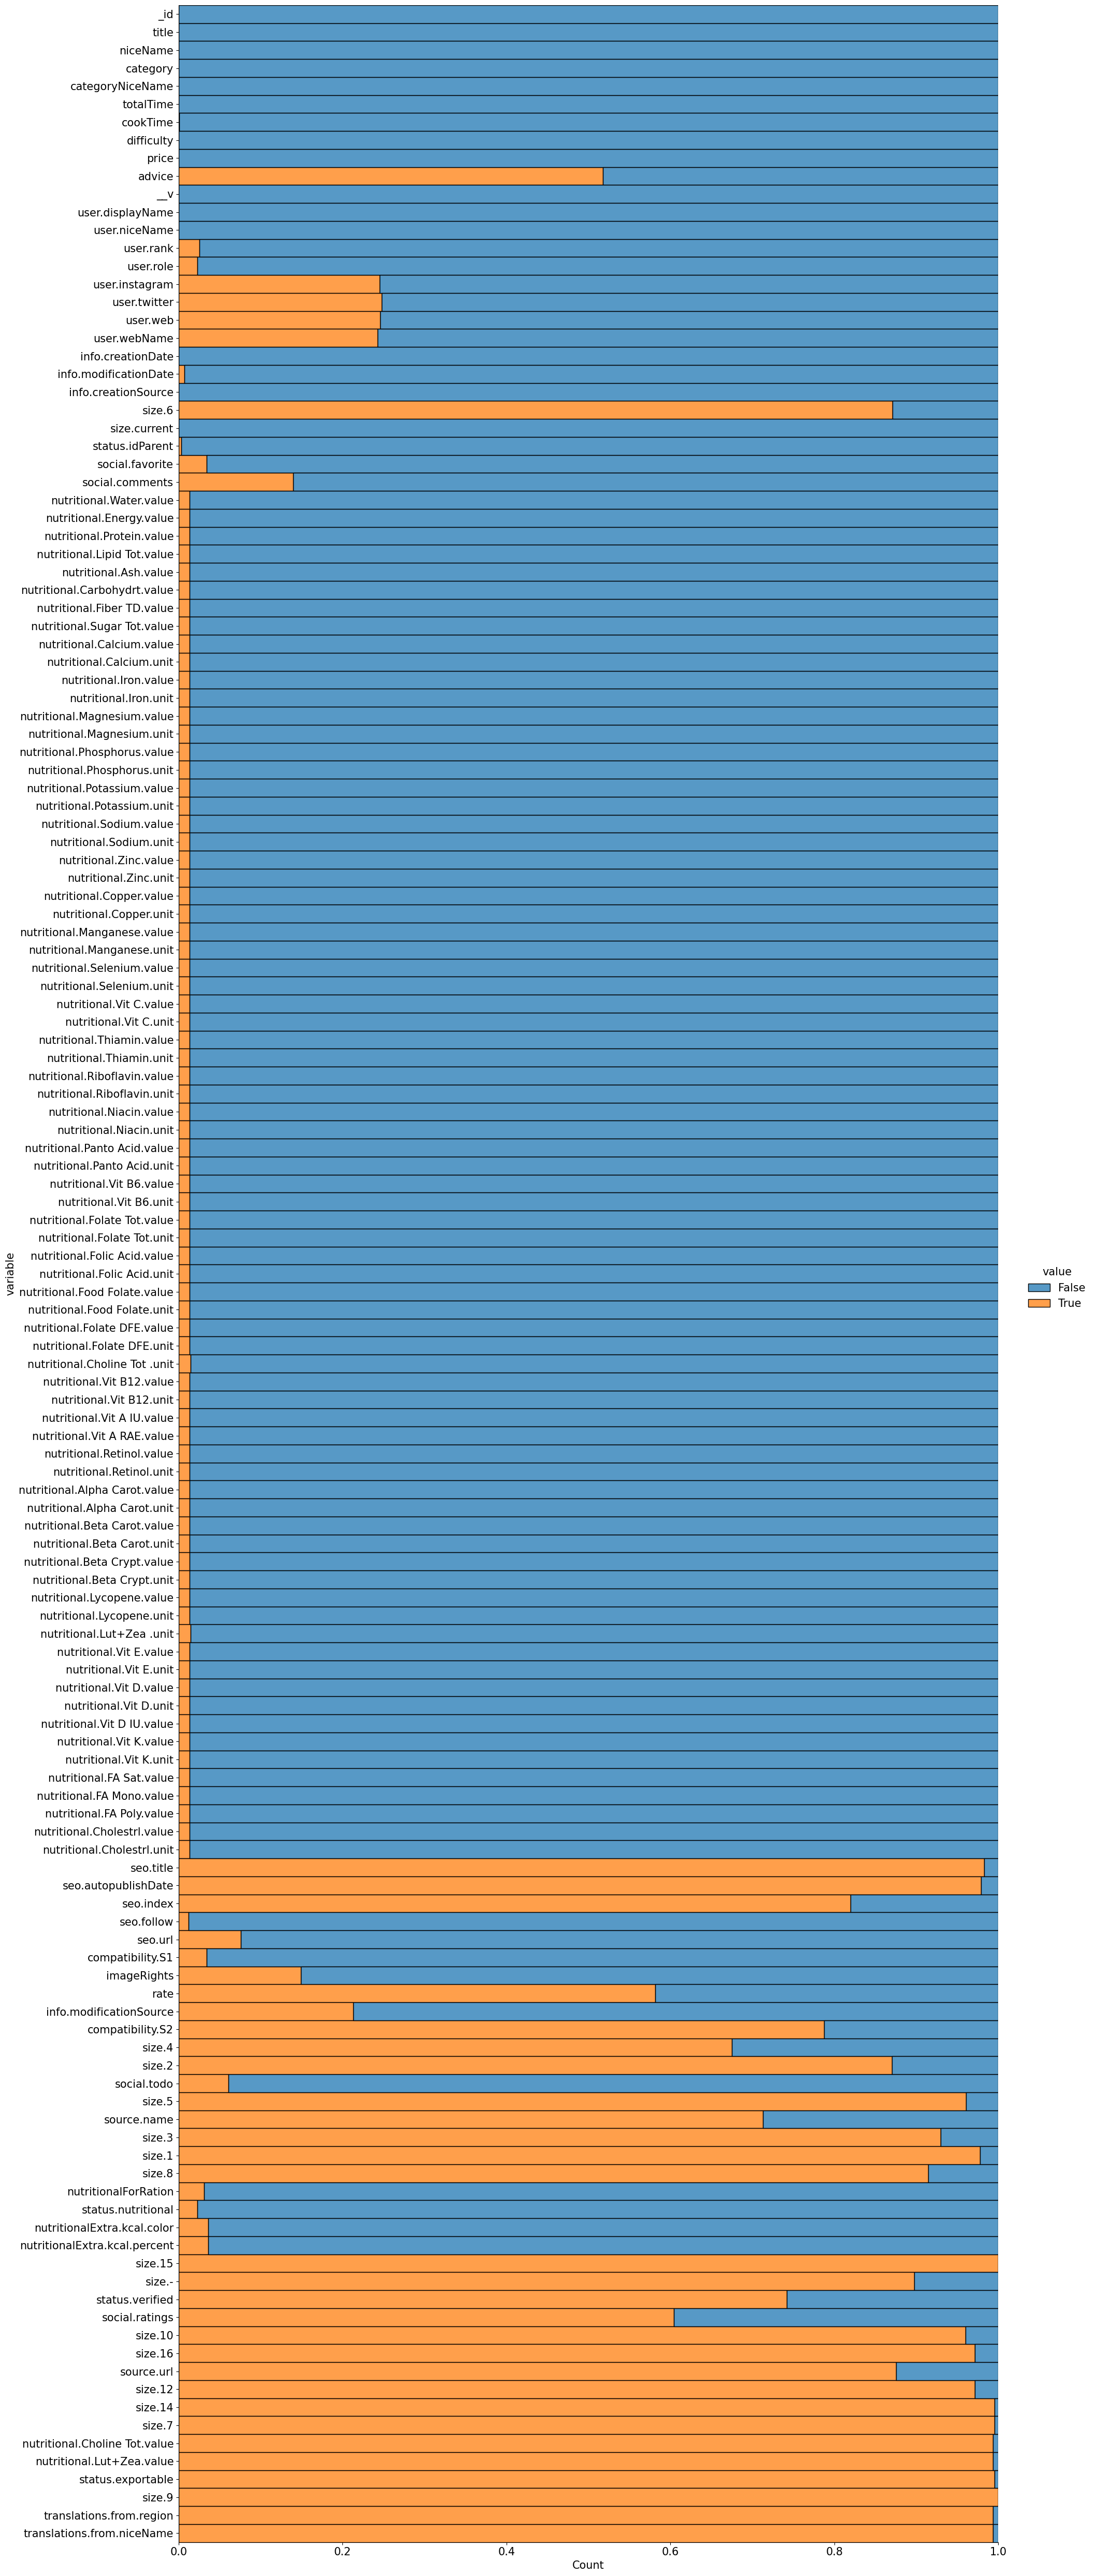

In [48]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_full_complete.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))


In [49]:
df_total = df_full_complete.copy()

In [50]:
df_total

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,__v,user.displayName,user.niceName,user.rank,user.role,user.instagram,user.twitter,user.web,user.webName,info.creationDate,info.modificationDate,info.creationSource,size.6,size.current,status.idParent,social.favorite,social.comments,nutritional.Water.value,nutritional.Energy.value,nutritional.Protein.value,nutritional.Lipid Tot.value,nutritional.Ash.value,nutritional.Carbohydrt.value,nutritional.Fiber TD.value,nutritional.Sugar Tot.value,nutritional.Calcium.value,nutritional.Calcium.unit,nutritional.Iron.value,nutritional.Iron.unit,nutritional.Magnesium.value,nutritional.Magnesium.unit,nutritional.Phosphorus.value,nutritional.Phosphorus.unit,nutritional.Potassium.value,nutritional.Potassium.unit,nutritional.Sodium.value,nutritional.Sodium.unit,nutritional.Zinc.value,nutritional.Zinc.unit,nutritional.Copper.value,nutritional.Copper.unit,nutritional.Manganese.value,nutritional.Manganese.unit,nutritional.Selenium.value,nutritional.Selenium.unit,nutritional.Vit C.value,nutritional.Vit C.unit,nutritional.Thiamin.value,nutritional.Thiamin.unit,nutritional.Riboflavin.value,nutritional.Riboflavin.unit,nutritional.Niacin.value,nutritional.Niacin.unit,nutritional.Panto Acid.value,nutritional.Panto Acid.unit,nutritional.Vit B6.value,nutritional.Vit B6.unit,nutritional.Folate Tot.value,nutritional.Folate Tot.unit,nutritional.Folic Acid.value,nutritional.Folic Acid.unit,nutritional.Food Folate.value,nutritional.Food Folate.unit,nutritional.Folate DFE.value,nutritional.Folate DFE.unit,nutritional.Choline Tot .unit,nutritional.Vit B12.value,nutritional.Vit B12.unit,nutritional.Vit A IU.value,nutritional.Vit A RAE.value,nutritional.Retinol.value,nutritional.Retinol.unit,nutritional.Alpha Carot.value,nutritional.Alpha Carot.unit,nutritional.Beta Carot.value,nutritional.Beta Carot.unit,nutritional.Beta Crypt.value,nutritional.Beta Crypt.unit,nutritional.Lycopene.value,nutritional.Lycopene.unit,nutritional.Lut+Zea .unit,nutritional.Vit E.value,nutritional.Vit E.unit,nutritional.Vit D.value,nutritional.Vit D.unit,nutritional.Vit D IU.value,nutritional.Vit K.value,nutritional.Vit K.unit,nutritional.FA Sat.value,nutritional.FA Mono.value,nutritional.FA Poly.value,nutritional.Cholestrl.value,nutritional.Cholestrl.unit,seo.title,seo.autopublishDate,seo.index,seo.follow,seo.url,compatibility.S1,imageRights,rate,info.modificationSource,compatibility.S2,size.4,size.2,social.todo,size.5,source.name,size.3,size.1,size.8,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent,size.15,size.-,status.verified,social.ratings,size.10,size.16,source.url,size.12,size.14,size.7,nutritional.Choline Tot.value,nutritional.Lut+Zea.value,status.exportable,size.9,translations.from.region,translations.from.niceName
0,67b3039f63368f7ece0cfbea,Salsa mozárabe de Belén,salsa-mozarabe-de-belen,Salsas y guarniciones,salsas-y-guarniciones,1080,1080.0,2,2,,0,juanantonio123456,juanantonio123456,user,user,,,,,2025-02-17T09:38:39.595Z,2025-02-17T09:38:39.595Z,194.11.19.156 - juanantonio123456 - Mycook App...,salsa-mozarabe-de-belen,6,,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.0,g,0.000000,g,0.000000,g,g,0.000000,g,0.000000,0.000000,0.00000,g,0.000000,g,0.000000,g,0.000000,g,0.0,g,g,0.000000,g,0.00000,g,0.00000,0.000000,g,0.000000,0.000000,0.000000,0.00000,g,,2025-02-17T09:38:39.598Z,False,True,"<a href=""https://mycook.es/receta/salsa-mozara...",salsa-mozarabe-de-belen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67b25ba063368f7ececdf1b3,Lentejas con arroz al aroma de Jerez (TM5 v2),lentejas-con-arroz-al-aroma-de-jerez--tm5-v2,Potajes y legumbres,

In [51]:
def borranulos(df, umbral=0.05):
    """
    Elimina filas con valores nulos en cada columna del DataFrame si el porcentaje de nulos es menor que un umbral.

    Parámetros:
        df (pd.DataFrame): El DataFrame original.
        umbral (float): Umbral de porcentaje de nulos permitido (por defecto 0.05, es decir, 5%).

    Retorna:
        pd.DataFrame: El DataFrame con las filas eliminadas.
    """
    for columna in df.columns:
        if (nulos := df[columna].isnull().mean()) < umbral:
            df.dropna(subset=[columna], inplace=True)
        else:
            print(f"Advertencia: El porcentaje de nulos en '{columna}' es {nulos:.2%}, "
                  f"que es mayor o igual al umbral de {umbral:.0%}. No se eliminaron filas.")
    return df

In [52]:
borranulos(df_total)

Advertencia: El porcentaje de nulos en 'advice' es 51.77%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.instagram' es 22.78%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.twitter' es 23.05%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.web' es 22.81%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.webName' es 22.51%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'size.6' es 87.18%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'social.comments' es 13.73%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'seo.title' es 98.78%, que es mayor o igual al umbral de 5%. No se eliminaron filas

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,__v,user.displayName,user.niceName,user.rank,user.role,user.instagram,user.twitter,user.web,user.webName,info.creationDate,info.modificationDate,info.creationSource,size.6,size.current,status.idParent,social.favorite,social.comments,nutritional.Water.value,nutritional.Energy.value,nutritional.Protein.value,nutritional.Lipid Tot.value,nutritional.Ash.value,nutritional.Carbohydrt.value,nutritional.Fiber TD.value,nutritional.Sugar Tot.value,nutritional.Calcium.value,nutritional.Calcium.unit,nutritional.Iron.value,nutritional.Iron.unit,nutritional.Magnesium.value,nutritional.Magnesium.unit,nutritional.Phosphorus.value,nutritional.Phosphorus.unit,nutritional.Potassium.value,nutritional.Potassium.unit,nutritional.Sodium.value,nutritional.Sodium.unit,nutritional.Zinc.value,nutritional.Zinc.unit,nutritional.Copper.value,nutritional.Copper.unit,nutritional.Manganese.value,nutritional.Manganese.unit,nutritional.Selenium.value,nutritional.Selenium.unit,nutritional.Vit C.value,nutritional.Vit C.unit,nutritional.Thiamin.value,nutritional.Thiamin.unit,nutritional.Riboflavin.value,nutritional.Riboflavin.unit,nutritional.Niacin.value,nutritional.Niacin.unit,nutritional.Panto Acid.value,nutritional.Panto Acid.unit,nutritional.Vit B6.value,nutritional.Vit B6.unit,nutritional.Folate Tot.value,nutritional.Folate Tot.unit,nutritional.Folic Acid.value,nutritional.Folic Acid.unit,nutritional.Food Folate.value,nutritional.Food Folate.unit,nutritional.Folate DFE.value,nutritional.Folate DFE.unit,nutritional.Choline Tot .unit,nutritional.Vit B12.value,nutritional.Vit B12.unit,nutritional.Vit A IU.value,nutritional.Vit A RAE.value,nutritional.Retinol.value,nutritional.Retinol.unit,nutritional.Alpha Carot.value,nutritional.Alpha Carot.unit,nutritional.Beta Carot.value,nutritional.Beta Carot.unit,nutritional.Beta Crypt.value,nutritional.Beta Crypt.unit,nutritional.Lycopene.value,nutritional.Lycopene.unit,nutritional.Lut+Zea .unit,nutritional.Vit E.value,nutritional.Vit E.unit,nutritional.Vit D.value,nutritional.Vit D.unit,nutritional.Vit D IU.value,nutritional.Vit K.value,nutritional.Vit K.unit,nutritional.FA Sat.value,nutritional.FA Mono.value,nutritional.FA Poly.value,nutritional.Cholestrl.value,nutritional.Cholestrl.unit,seo.title,seo.autopublishDate,seo.index,seo.follow,seo.url,compatibility.S1,imageRights,rate,info.modificationSource,compatibility.S2,size.4,size.2,social.todo,size.5,source.name,size.3,size.1,size.8,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent,size.15,size.-,status.verified,social.ratings,size.10,size.16,source.url,size.12,size.14,size.7,nutritional.Choline Tot.value,nutritional.Lut+Zea.value,status.exportable,size.9,translations.from.region,translations.from.niceName
20,67aa4802c995db82d9be53da,Relleno para tarta de atún,relleno-para-tarta-de-atun,Pescados y mariscos,pescados-y-mariscos,630,630.0,1,2,NaN,0,Vane,vanemiano,user_recipes_5,user,,,,,2025-02-10T18:40:01.317Z,2025-02-11T08:37:46.727Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,4,,1.0,0.0,239.709410,453.121000,32.570790,29.910160,3.289440,13.544750,2.415300,5.792190,238.094500,mg,1.915290,mg,54.202000,mg,422.853000,mg,525.544500,mg,602.483000,mg,1.830390,mg,0.145015,mg,0.257223,mg,71.705500,ug,47.605000,mg,0.110958,mg,0.327510,mg,5.488393,mg,0.932819,mg,0.517091,mg,43.772000,ug,0.0,ug,43.772000,ug,43.772000,ug,mg,1.561600,ug,874.622000,192.677000,179.15000,ug,10.512000,ug,120.310000,ug,6.360000,ug,0.020000,ug,ug,2.755665,mg,2.53000,ug,101.58000,12.480700,ug,12.658257,12.679747,2.984701,207.430000,mg,NaN,2025-02-10T18:40:02.136Z,False,True,NaN,relleno-para-tarta-de-atun,False,NaN,80.26.90.116 - ondho - Mozilla/5.0 (Windows NT...,relleno-para-tarta-de-atun,relleno-para-tarta-de-atun,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,Auto (Bad),Yellow,22.656050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,679cdc1d0f62ba1b8e

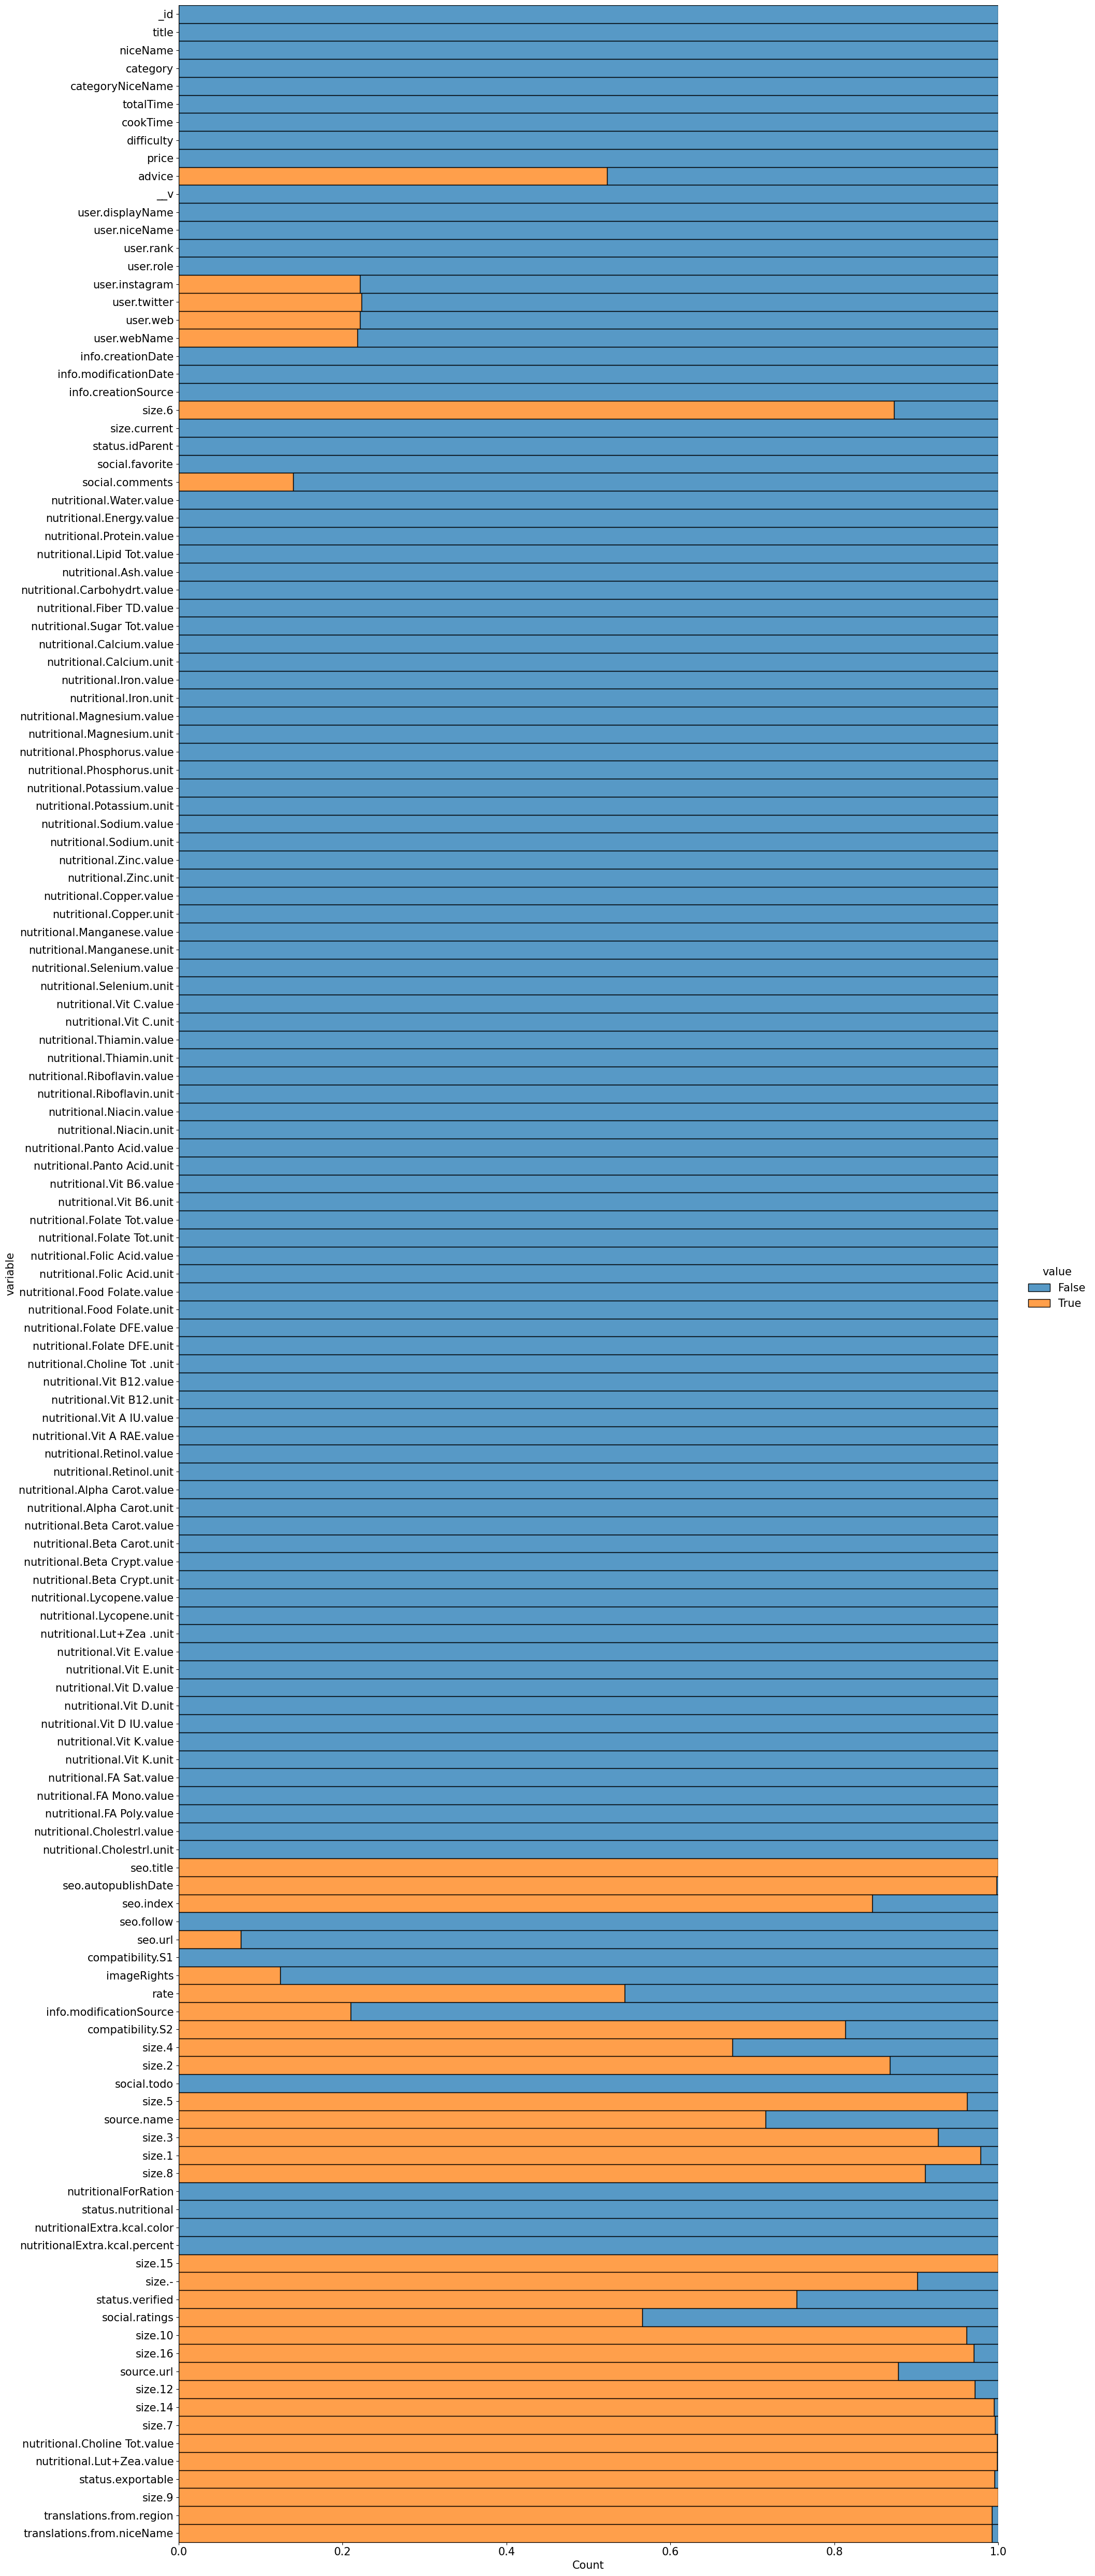

In [53]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_total.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))

In [54]:


def analizar_nulos(df):
    """
    Recorre todas las columnas de un DataFrame y muestra información detallada de las columnas que tienen valores nulos.

    Parámetros:
        df (pd.DataFrame): El DataFrame a analizar.
    """
    for columna in df.columns:
        if df[columna].isnull().sum() > 0:  # Verificar si la columna tiene nulos
            print(f"\n=== Análisis de la columna '{columna}' ===")
            
            # 1. Valores únicos
            print("\nValores únicos:")
            print(df[columna].unique())
            
            # 2. Cantidad de nulos
            print(f"\nCantidad de nulos: {df[columna].isnull().sum()}")
            
            # 3. Porcentaje de nulos
            porcentaje_nulos = df[columna].isnull().mean() * 100
            print(f"Porcentaje de nulos: {porcentaje_nulos:.2f}%")
            
            # 4. Value counts (frecuencia de valores)
            print("\nFrecuencia de valores (value_counts):")
            print(df[columna].value_counts(dropna=False))  # Incluye nulos
            
            # 5. Value counts normalizado (proporción de valores)
            print("\nProporción de valores (value_counts normalize=True):")
            print(df[columna].value_counts(normalize=True, dropna=False))  # Incluye nulos
            
            # 6. Tipo de dato de la columna
            print(f"\nTipo de dato: {df[columna].dtype}")
            
            # 7. Estadísticas descriptivas (si la columna es numérica)
            if pd.api.types.is_numeric_dtype(df[columna]):
                print("\nEstadísticas descriptivas:")
                print(df[columna].describe())
            
            # 8. Cantidad de valores no nulos
            print(f"\nCantidad de valores no nulos: {df[columna].notnull().sum()}")
            
            print("\n" + "=" * 50)  # Separador visual


In [55]:
analizar_nulos(df_total)


=== Análisis de la columna 'advice' ===

Valores únicos:
[nan
 '1.\tUtiliza mandarinas frescas. El sabor cítrico y jugoso de las mandarinas frescas hará que el bizcocho tenga un toque único. Aprovecha tanto el zumo como la ralladura de la piel para intensificar el sabor.\n\t2.\tAsegúrate de que los huevos estén a temperatura ambiente. Esto ayudará a que se mezclen mejor y el bizcocho tenga una textura más suave y esponjosa.\n\t3.\tCuando incorpores la harina, hazlo con movimientos suaves para evitar que el bizcocho quede denso. Mezclar demasiado puede hacer que pierda ligereza.\n\t4.\tCada horno es diferente, así que asegúrate de comprobar la cocción del bizcocho pinchando con un palillo. Si sale limpio, ¡está listo!\n\t5.\tDeja reposar el bizcocho unos minutos en el molde antes de desmoldarlo. Esto ayudará a que no se rompa y mantenga su forma.\n\t6.\tSi quieres darle un toque especial, espolvorea un poco de azúcar glas por encima una vez que el bizcocho esté frío. También puedes aña

### inputamos algunos nulos

In [56]:
df_total["advice"].fillna("No disponible", inplace=True)
df_total["user.webName"].fillna("No disponible", inplace=True)
df_total["user.instagram"].fillna("No disponible", inplace=True)
df_total["user.twitter"].fillna("No disponible", inplace=True)
df_total["user.web"].fillna("No disponible", inplace=True)
df_total["imageRights"].fillna("No disponible", inplace=True)
df_total["rate"].fillna("No disponible", inplace=True)

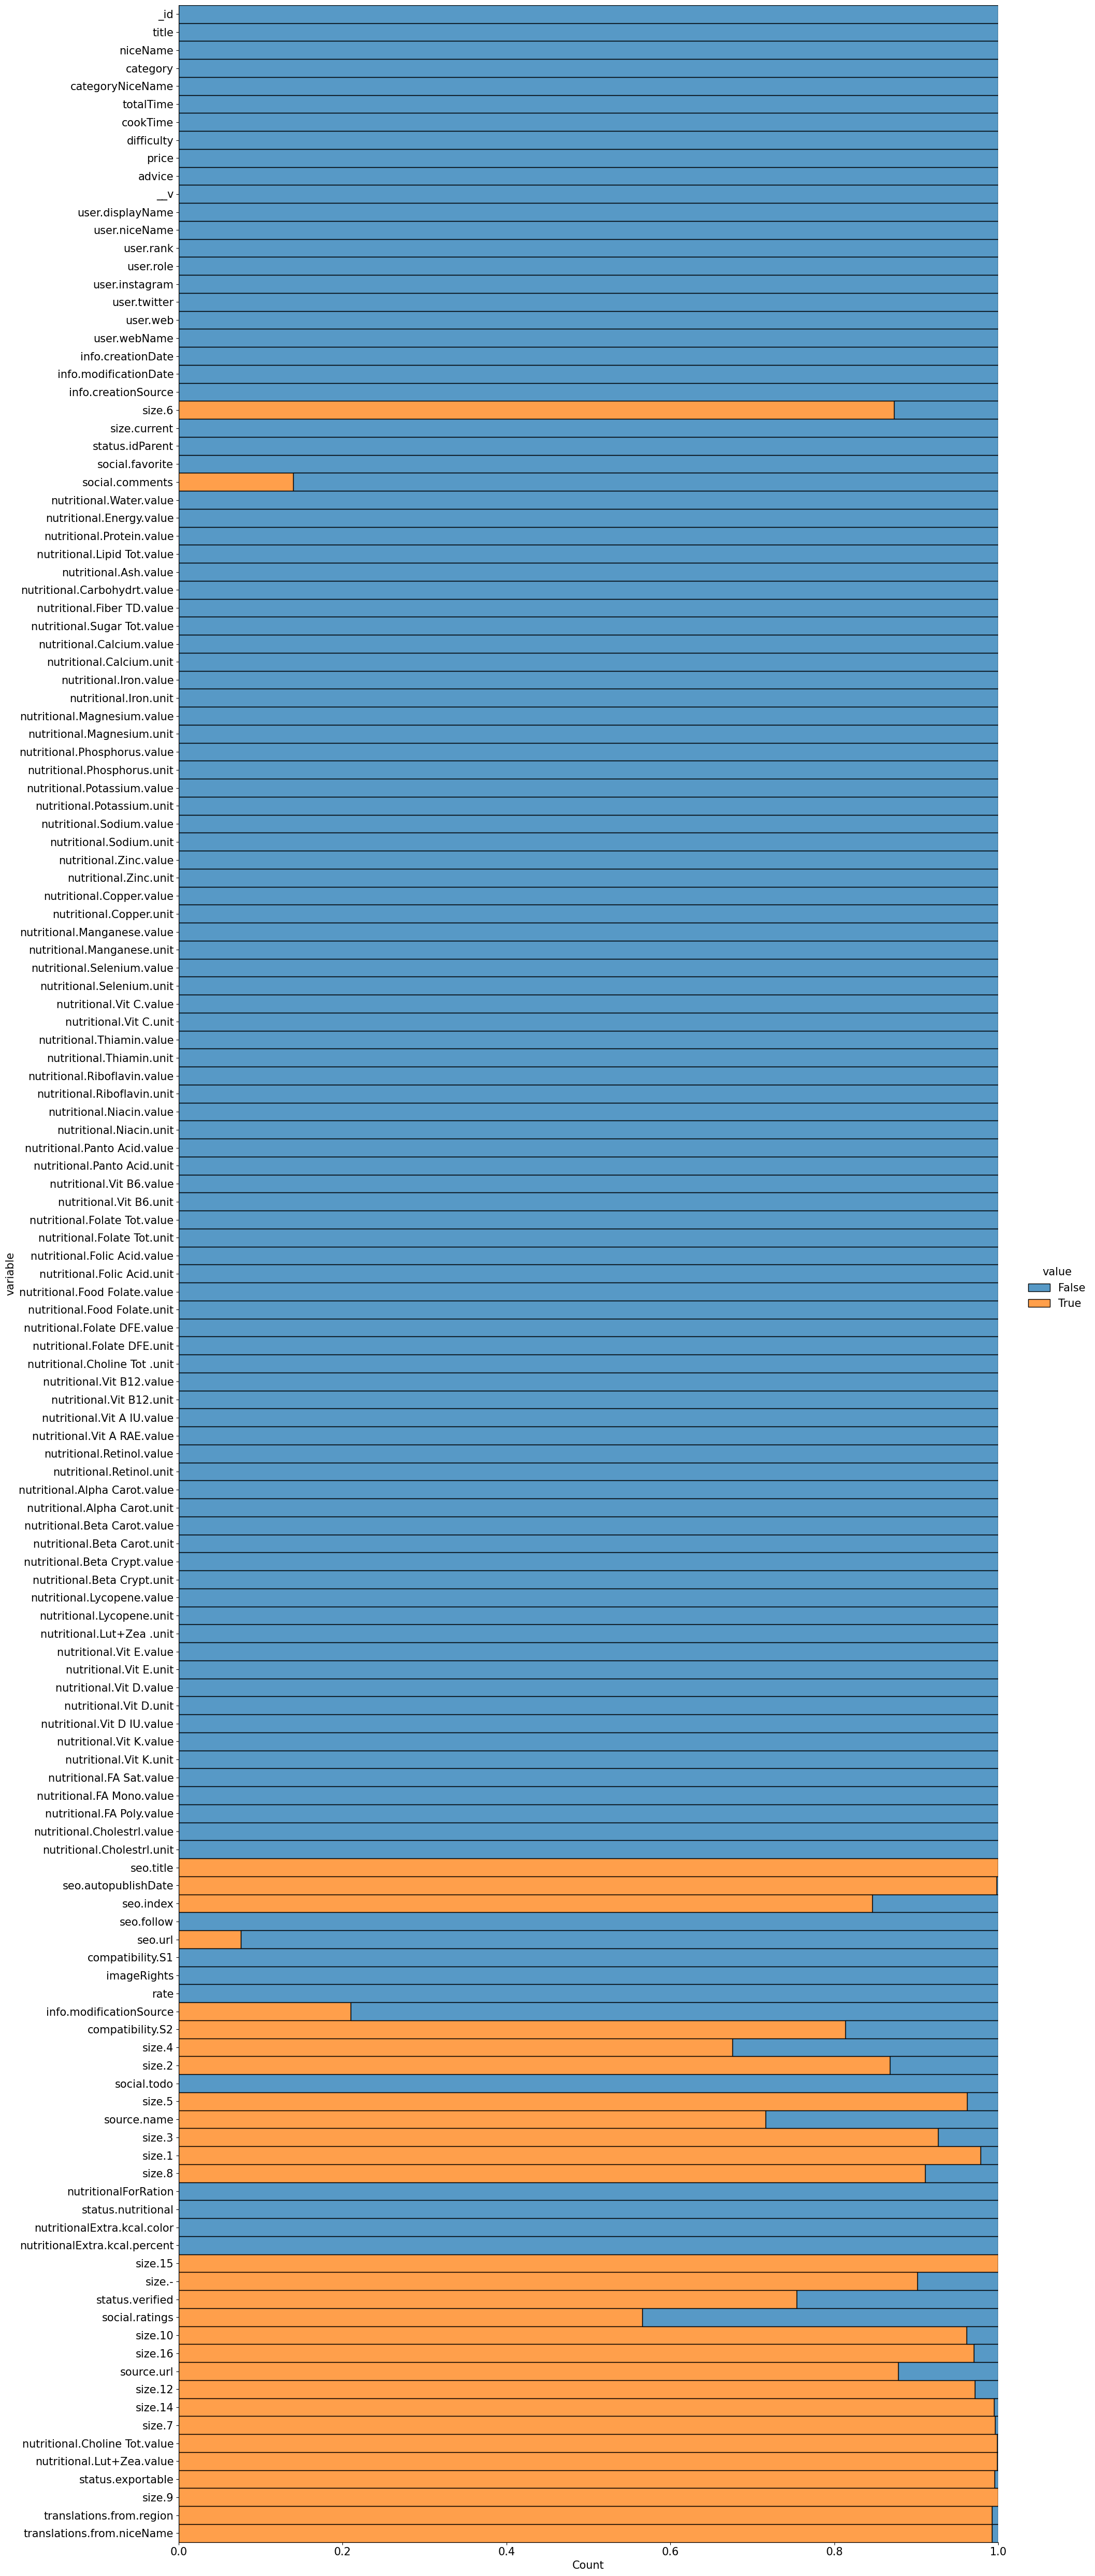

In [57]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_total.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))

### despues de explorar las columnas con nulos de forma manual decidimos borrarlas

In [58]:
df_total.dropna(axis=1, how='any',inplace=True)

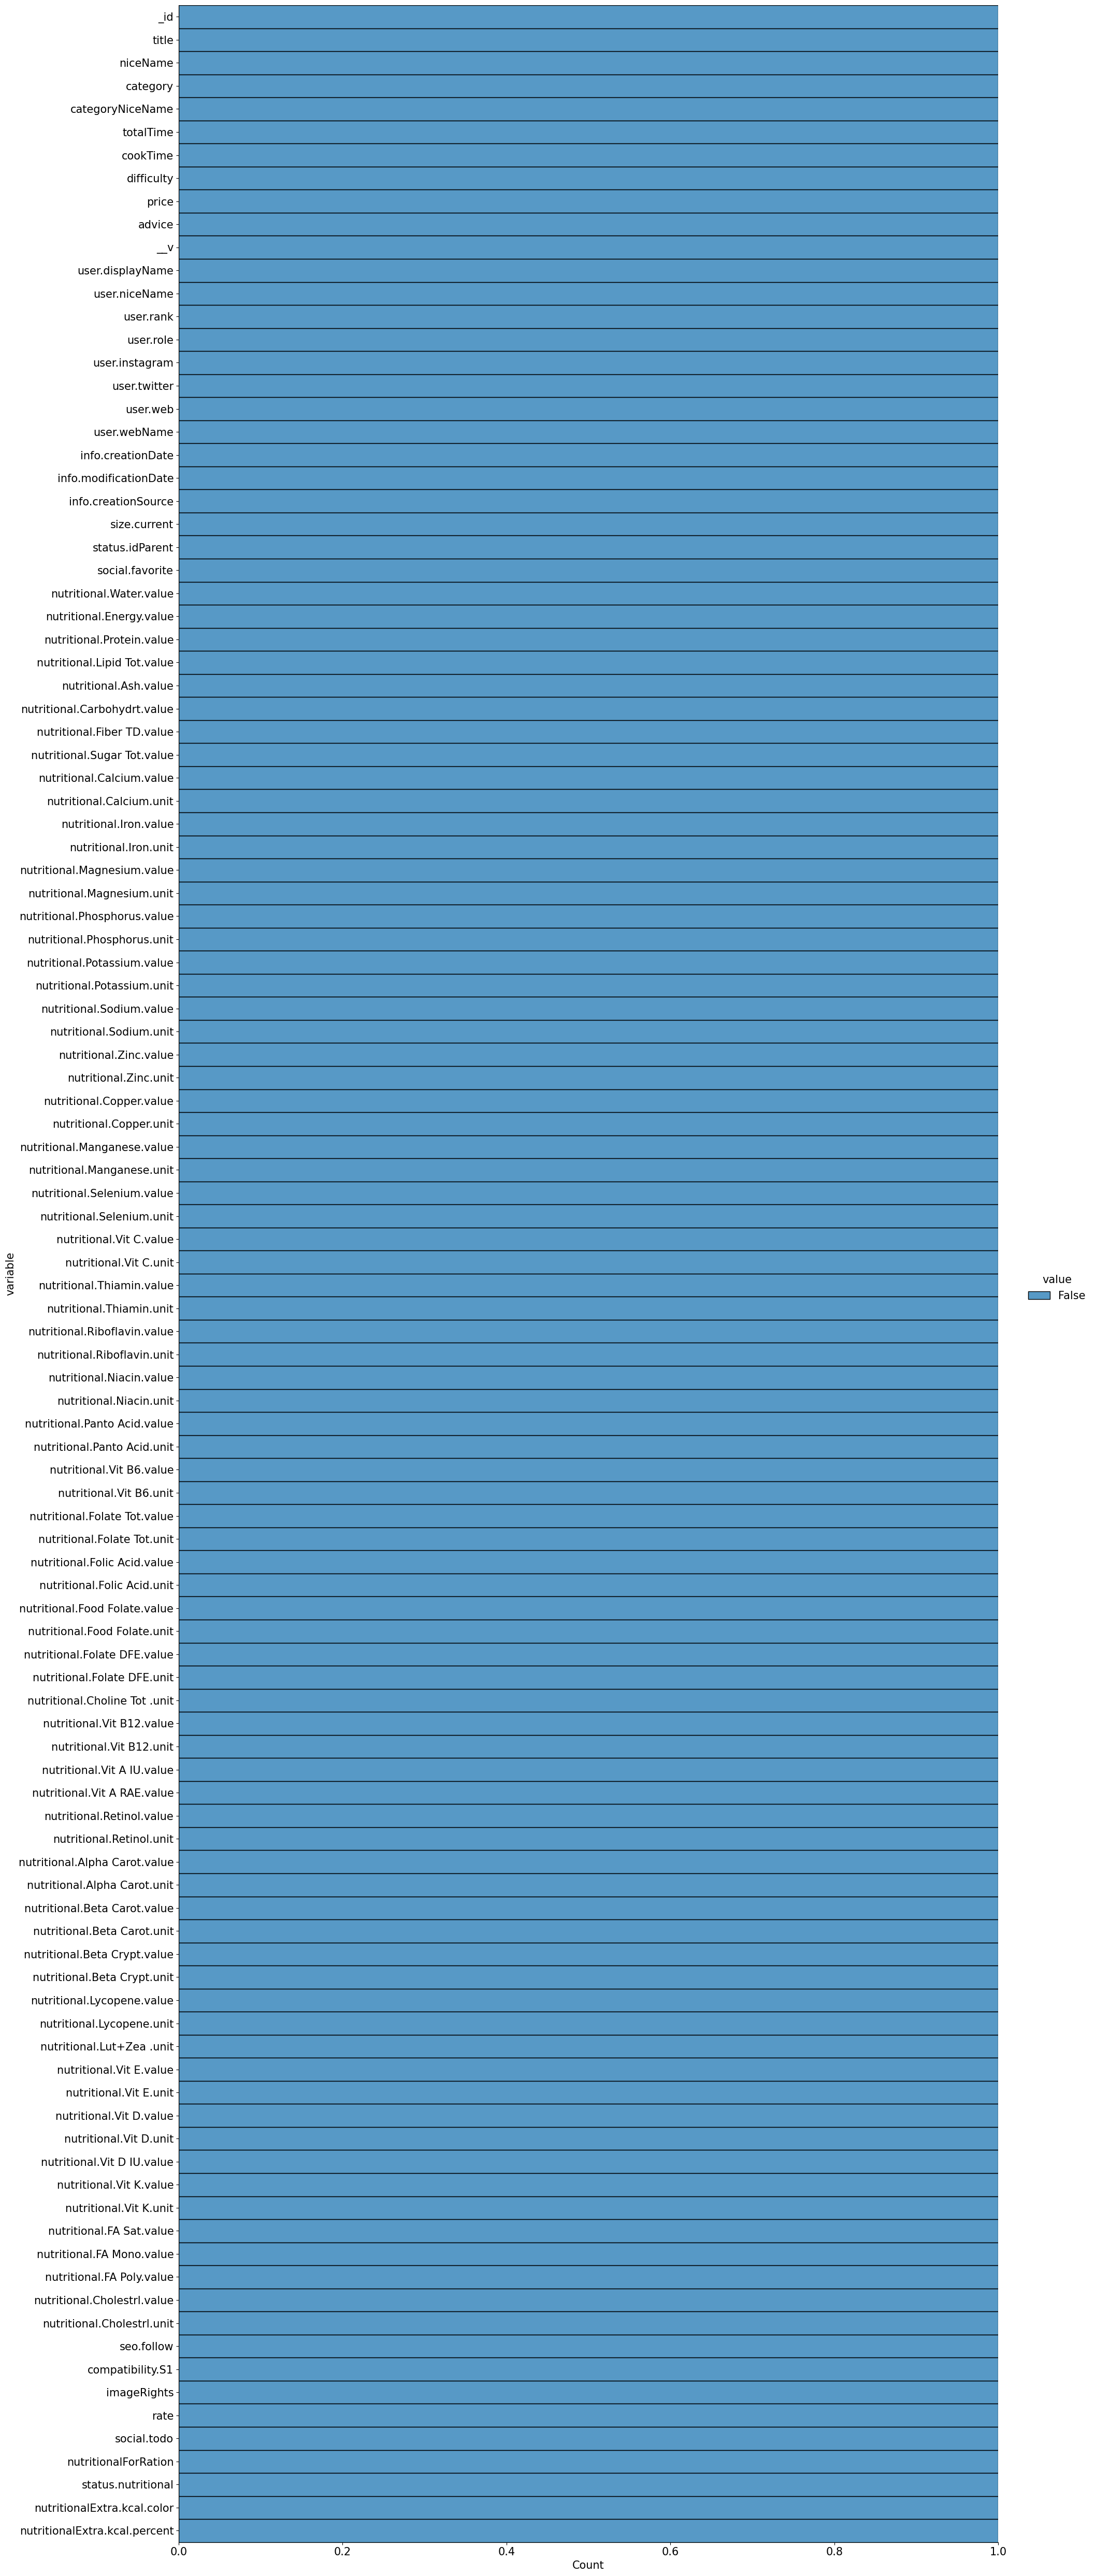

In [93]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_total.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))

Ya tenemos el df_total sin nulos y sin duplicados. ya podemos operar con el y hacer algunas graficas

In [60]:
df_total.head()

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,__v,user.displayName,user.niceName,user.rank,user.role,user.instagram,user.twitter,user.web,user.webName,info.creationDate,info.modificationDate,info.creationSource,size.current,status.idParent,social.favorite,nutritional.Water.value,nutritional.Energy.value,nutritional.Protein.value,nutritional.Lipid Tot.value,nutritional.Ash.value,nutritional.Carbohydrt.value,nutritional.Fiber TD.value,nutritional.Sugar Tot.value,nutritional.Calcium.value,nutritional.Calcium.unit,nutritional.Iron.value,nutritional.Iron.unit,nutritional.Magnesium.value,nutritional.Magnesium.unit,nutritional.Phosphorus.value,nutritional.Phosphorus.unit,nutritional.Potassium.value,nutritional.Potassium.unit,nutritional.Sodium.value,nutritional.Sodium.unit,nutritional.Zinc.value,nutritional.Zinc.unit,nutritional.Copper.value,nutritional.Copper.unit,nutritional.Manganese.value,nutritional.Manganese.unit,nutritional.Selenium.value,nutritional.Selenium.unit,nutritional.Vit C.value,nutritional.Vit C.unit,nutritional.Thiamin.value,nutritional.Thiamin.unit,nutritional.Riboflavin.value,nutritional.Riboflavin.unit,nutritional.Niacin.value,nutritional.Niacin.unit,nutritional.Panto Acid.value,nutritional.Panto Acid.unit,nutritional.Vit B6.value,nutritional.Vit B6.unit,nutritional.Folate Tot.value,nutritional.Folate Tot.unit,nutritional.Folic Acid.value,nutritional.Folic Acid.unit,nutritional.Food Folate.value,nutritional.Food Folate.unit,nutritional.Folate DFE.value,nutritional.Folate DFE.unit,nutritional.Choline Tot .unit,nutritional.Vit B12.value,nutritional.Vit B12.unit,nutritional.Vit A IU.value,nutritional.Vit A RAE.value,nutritional.Retinol.value,nutritional.Retinol.unit,nutritional.Alpha Carot.value,nutritional.Alpha Carot.unit,nutritional.Beta Carot.value,nutritional.Beta Carot.unit,nutritional.Beta Crypt.value,nutritional.Beta Crypt.unit,nutritional.Lycopene.value,nutritional.Lycopene.unit,nutritional.Lut+Zea .unit,nutritional.Vit E.value,nutritional.Vit E.unit,nutritional.Vit D.value,nutritional.Vit D.unit,nutritional.Vit D IU.value,nutritional.Vit K.value,nutritional.Vit K.unit,nutritional.FA Sat.value,nutritional.FA Mono.value,nutritional.FA Poly.value,nutritional.Cholestrl.value,nutritional.Cholestrl.unit,seo.follow,compatibility.S1,imageRights,rate,social.todo,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent
20,67aa4802c995db82d9be53da,Relleno para tarta de atún,relleno-para-tarta-de-atun,Pescados y mariscos,pescados-y-mariscos,630,630.0,1,2,No disponible,0,Vane,vanemiano,user_recipes_5,user,,,,,2025-02-10T18:40:01.317Z,2025-02-11T08:37:46.727Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4,,1.0,239.709410,453.121000,32.570790,29.910160,3.289440,13.544750,2.415300,5.792190,238.094500,mg,1.915290,mg,54.202000,mg,422.853000,mg,525.544500,mg,602.483000,mg,1.830390,mg,0.145015,mg,0.257223,mg,71.705500,ug,47.605000,mg,0.110958,mg,0.327510,mg,5.488393,mg,0.932819,mg,0.517091,mg,43.772000,ug,0.0,ug,43.772000,ug,43.772000,ug,mg,1.561600,ug,874.622000,192.677000,179.15000,ug,10.512000,ug,120.310000,ug,6.360000,ug,0.020000,ug,ug,2.755665,mg,2.5300,ug,101.5800,12.480700,ug,12.658257,12.679747,2.984701,207.430000,mg,True,relleno-para-tarta-de-atun,False,No disponible,1.0,False,Auto (Bad),Yellow,22.656050
45,679cdc1d0f62ba1b8efdc7fb,"Bizcocho de mandarina: ¡esponjoso, jugoso y de...",bizcocho-de-mandarina---esponjoso--jugoso-y-de...,Dulces y repostería,dulces-y-reposteria,6840,250.0,1,1,1.\tUtiliza mandarinas frescas. El sabor cítri...,0,El Rincón de Belén,elrincondebelen,user_recipes_50,user,rinconbelenrepostera,,https://www.youtube.com/channel/UCtChg7RtWM0f1...,El Rincón de Belén,2025-01-31T14:20:13.228Z,2025-02-10T16:21:54.286Z,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,8,,1.0,78.779724,352.116416,6.714433,15.787525,1.216608,47.421143,2.197956,26.008424,51.736207,mg,0.914830,mg,23.199773,mg,101.860540,mg,189.516375,mg,39

In [61]:
df_total["category"].value_counts()

category
Dulces y repostería                 2230
Cremas, caldos y sopas               795
Huevos y tarrinas                    759
Carnes y aves                        623
Verduras y hortalizas                568
Masas                                538
Aperitivos y tapas                   492
Salsas y guarniciones                463
Potajes y legumbres                  392
Arroces                              390
Pescados y mariscos                  331
Pasta                                308
Bebidas y cócteles                   233
Papillas y alimentación infantil     121
Sorbetes y helados                   103
Ensaladas                             68
Vinagretas y aliños                   24
Name: count, dtype: int64

In [62]:
file_name = "df_Final.csv"
df_total.to_csv(file_name, index=False)

In [64]:
df_full.head(1)

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps
0,Salsa mozárabe de Belén,salsa-mozarabe-de-belen,Salsas y guarniciones,18.0,2,2,"Aceite Oliva (35 ml), Cebolla (150 gr), Pasas ...",6,,Plato principal,"Calentar el aceite, Añadir Cebolla, pasas y or..."


In [91]:
df_total.isnull().sum().sum()

np.int64(0)

In [85]:
import pandas as pd

# Mapeo de categorías a tipos de plato
category_to_course = {
    "Aperitivos y tapas": "entrante",
    "Vinagretas y aliños": "entrante",
    "Ensaladas": "primer plato",
    "Cremas, caldos y sopas": "primer plato",
    "Potajes y legumbres": "primer plato",
    "Verduras y hortalizas": "primer plato",
    "Carnes y aves": "segundo plato",
    "Pescados y mariscos": "segundo plato",
    "Huevos y tarrinas": "segundo plato",
    "Pasta": "segundo plato",
    "Arroces": "segundo plato",
    "Masas": "segundo plato",
    "Dulces y repostería": "postre",
    "Sorbetes y helados": "postre",
    "Papillas y alimentación infantil": "postre",
    "Bebidas y cócteles": "bebida",
    "Salsas y guarniciones": "entrante"  # Aunque es una salsa, podría considerarse como parte de un entrante
}

# Añadir la columna 'course' al dataframe
df_full['course'] = df_full['category'].map(category_to_course)

# Mostrar el dataframe con la nueva columna
df_full.head()

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps,course
0,Salsa mozárabe de Belén,salsa-mozarabe-de-belen,Salsas y guarniciones,18.00,2,2,"Aceite Oliva (35 ml), Cebolla (150 gr), Pasas ...",6,,Plato principal,"Calentar el aceite, Añadir Cebolla, pasas y or...",entrante
1,Lentejas con arroz al aroma de Jerez (TM5 v2),lentejas-con-arroz-al-aroma-de-jerez--tm5-v2,Potajes y legumbres,0.05,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",6,,Plato principal,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...,primer plato
2,Lentejas con arroz al aroma de Jerez (TM5),lentejas-con-arroz-al-aroma-de-jerez,Potajes y legumbres,0.05,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",5,,Plato principal,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...,primer plato
3,Arroz Rojo Integral con Gambas y Calamar al Aj...,arroz-rojo-integral-con-gambas-y-calamar-al-aj...,Arroces,43.50,1,1,"Ajo (3 clv), Aceite Oliva (60 gr), Guindilla (...",6,Gastronomía/Asiática,Plato principal,Mete los ajos en la jarra junto con el aceite ...,segundo plato
4,Galletas sin azúcar (Snacks),galletas-sin-azucar--snacks,Dulces y repostería,3.00,1,1,"Plátano (2 u), Avena en copos (80 gr), Cacao (...",2,"Dietas/Baja en calorías, Gastronomía/Mediterránea",Plato principal,"Añadimos todos los ingredientes a la jarra, Qu...",postre


In [86]:
del(df_full["group_name"])

In [90]:
df_full.isnull().sum(
    
)

title          0
niceName       0
category       0
totalTime      0
difficulty     0
price          0
ingredients    0
steps          0
tags           0
group_steps    0
course         0
dtype: int64

In [94]:
df_full["tags"].fillna("No disponible", inplace=True)

In [95]:
file_name = "receta_info.csv"
df_total.to_csv(file_name, index=False)

In [96]:
file_name = "receta.csv"
df_full.to_csv(file_name, index=False)

In [98]:
file_name = "categorias.csv"
df_categorias.to_csv(file_name, index=False)